Question 1
---

In [1]:
"this part is corresponding to Question 1 - 6"

import csv
import numpy as np
import math

In [2]:
path = "../ml-latest-small/ratings.csv"
total_possible_rating = 0
total_available_rating = 0
rating_distribution = [0] * 10

with open(path, 'r') as myFile:
    lines = csv.reader(myFile)
    user = dict()
    movie_rating = dict()
    first_row = True
    for line in lines:
        if first_row:
            first_row = False
            continue
        total_available_rating += 1
        user_id = int(line[0])
        movie_id = int(line[1])
        rating = float(line[2])
        
        u = user[user_id] if (user_id in user) else 0
        user[user_id] = u + 1
        if (movie_id in movie_rating):
            movie_rating[movie_id].append(rating)
        else:
            movie_rating[movie_id] = [rating]
        
        rating = float(line[2])
        rating_index = int(rating / 0.5) - 1
        rating_distribution[rating_index] += 1
    total_possible_rating = len(user) * len(movie_rating)

# print total_available_rating
# print total_possible_rating
print float(total_available_rating) / total_possible_rating

0.0164391416087


Question 2
---

[1101, 3326, 1687, 7271, 4449, 20064, 10538, 28750, 7723, 15095]


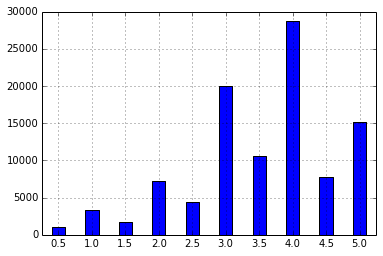

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

print rating_distribution

def plot_histogram(x_labels, y, width = 0.4):
    ind = np.linspace(0.5, 9.5, len(x_labels))
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.bar(ind - 0.2, y, width)
    ax.set_xticks(ind)
    ax.set_xticklabels(x_labels)
    plt.grid(True)
    plt.show()
    
plot_histogram([i * 0.5 for i in range(1, 11)], rating_distribution)

Question 3
---

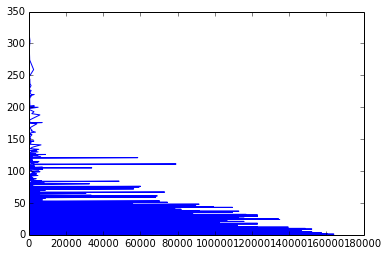

In [5]:
movie_list = [(i, len(movie_rating[i])) for i in movie_rating]
movie_list = sorted(movie_list, cmp = lambda x, y: cmp(y[1], x[1]))
movie_x = [str(i[0]) for i in movie_list]
movie_y = [i[1] for i in movie_list]
plt.plot(movie_x, movie_y)
plt.show()

Question 4
---

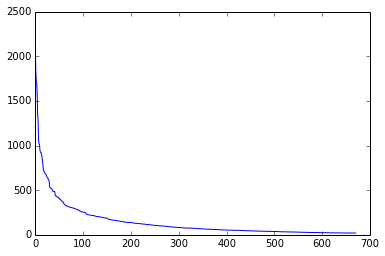

In [4]:
user_list = [(i, user[i]) for i in user]
user_list = sorted(user_list, cmp = lambda x, y: cmp(y[1], x[1]))
# user_x = [i[0] for i in user_list][:100]
user_y = [i[1] for i in user_list]
plt.plot(user_y)
plt.show()

Question 6
---

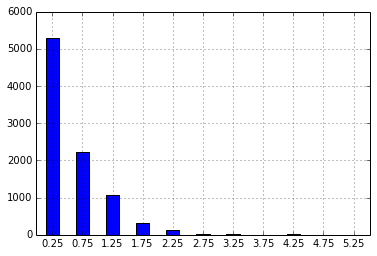

In [5]:
movie_rating_variance = {i: np.var(movie_rating[i]) for i in movie_rating}
movie_variance = movie_rating_variance.values()
a = 0
for i in movie_variance:
    a = max(a, i)
top = int(math.ceil(a / 0.5))
variance_x = [i * 0.5 + 0.25 for i in range(0, top)]
variance_y = [0] * top

for i in movie_variance:
    variance_y[int(i / 0.5)] += 1

plot_histogram(variance_x, variance_y)